In [1]:
# ! pip install polars

# Convert home_areas to Parquet and SQLite database

In [9]:
%load_ext autoreload
%autoreload 2

import Advan_operator as ad_op    
import pandas as pd
import os
import random
import sqlite3 
import numpy as np
import json
import math

pd.set_option('display.max_columns', None)
import os
import duckdb
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import random

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
parquet_dir = r'D:\Data\Advan\dewey-downloads\neighborhood-patterns_parquets'

con = duckdb.connect()

# set multiprocessing
con.execute("PRAGMA threads=8;")

# create a view for all parquet files
con.execute(f"""
    CREATE OR REPLACE VIEW neighborhood_patterns AS
    SELECT *
    FROM parquet_scan('{parquet_dir}/*.parquet')
""")

# select  100 rows to test
# offset = random.randint(0, 1000000)
con.execute(f"""SELECT * FROM neighborhood_patterns LIMIT 100 ;""")
df = con.fetchdf()
df

AREA           AREA_TYPE  \
0   480913104031  Census Block Group   
1   481130136063  Census Block Group   
2   484279506001  Census Block Group   
3   482015413004  Census Block Group   
4   484391138092  Census Block Group   
..           ...                 ...   
95  360550146011  Census Block Group   
96  360290079043  Census Block Group   
97  360810327001  Census Block Group   
98  360470594024  Census Block Group   
99  360470342002  Census Block Group   

                          BREAKFAST_DEVICE_HOME_AREAS  \
0   "{\"480913104031\":170,\"480913108022\":61,\"4...   
1   "{\"481130136063\":71,\"481130136081\":23,\"48...   
2   "{\"484279506004\":30,\"484279506001\":19,\"48...   
3   "{\"482015413004\":91,\"482015413001\":17,\"48...   
4   "{\"484391138092\":73,\"484391139215\":54,\"48...   
..                                                ...   
95  "{\"360550146011\":37,\"360550146013\":27,\"36...   
96  "{\"360290079043\":33,\"360290079033\":17,\"36...   
97  "{\"360810327001\":44,\"360810329001\":10,\"36...   
98  "{\"360470594024\":44,\"360470594011\":6,\"360...   
99  "{\"360470342002\":49,\"360470342001\":11,\"36...   

             DATE_RANGE_END         DATE_RANGE_START  \
0   2022-02-01 00:00:00.000  2022-01-01 00:00:00.000   
1   2022-02-01 00:00:00.000  2022-01-01 00:00:00.000   
2   2022-02-01 00:00:00.000  2022-01-01 00:00:00.000   
3   2022-02-01 00:00:00.000  2022-01-01 00:00:00.000   
4   2022-02-01 00:00:00.000  2022-01-01 00:00:00.000   
..                      ...                      ...   
95  2022-02-01 00:00:00.000  2022-01-01 00:00:00.000   
96  2022-02-01 00:00:00.000  2022-01-01 00:00:00.000   
97  2022-02-01 00:00:00.000  2022-01-01 00:00:00.000   
98  2022-02-01 00:00:00.000  2022-01-01 00:00:00.000   
99  2022-02-01 00:00:00.000  2022-01-01 00:00:00.000   

                                           DAY_COUNTS  \
0   "{\"Monday\":5,\"Tuesday\":4,\"Wednesday\":4,\...   
1   "{\"Monday\":5,\"Tuesday\":4,\"Wednesday\":4,\...   
2   "{\"Monday\":5,\"Tuesday\":4,\"Wednesday\":4,\...   
3   "{\"Monday\":5,\"Tuesday\":4,\"Wednesday\":4,\...   
4   "{\"Monday\":5,\"Tuesday\":4,\"Wednesday\":4,\...   
..                                                ...   
95  "{\"Monday\":5,\"Tuesday\":4,\"Wednesday\":4,\...   
96  "{\"Monday\":5,\"Tuesday\":4,\"Wednesday\":4,\...   
97  "{\"Monday\":5,\"Tuesday\":4,\"Wednesday\":4,\...   
98  "{\"Monday\":5,\"Tuesday\":4,\"Wednesday\":4,\...   
99  "{\"Monday\":5,\"Tuesday\":4,\"Wednesday\":4,\...   

                                 DEVICE_DAYTIME_AREAS  \
0   "{\"480913105022\":236,\"480913103002\":215,\"...   
1   "{\"481130136063\":70,\"480850317082\":70,\"48...   
2   "{\"484279506002\":123,\"484279506004\":121,\"...   
3   "{\"482015413004\":71,\"482015412011\":53,\"48...   
4   "{\"484391139215\":188,\"484391139201\":124,\"...   
..                                                ...   
95  "{\"360550150001\":138,\"360550146013\":55,\"3...   
96  "{\"360290079043\":95,\"360290080015\":24,\"36...   
97  "{\"360810327001\":36,\"360810327002\":17,\"36...   
98  "{\"360470594024\":47,\"360470594011\":13,\"36...   
99  "{\"360470342002\":52,\"360470342001\":25,\"36...   

                                    DEVICE_HOME_AREAS  \
0   "{\"480913104031\":232,\"480913105022\":193,\"...   
1   "{\"481130136063\":88,\"481130136201\":52,\"48...   
2   "{\"484279506004\":132,\"484279506002\":104,\"...   
3   "{\"482015413004\":121,\"482015413001\":35,\"4...   
4   "{\"484391139215\":151,\"484391139202\":108,\"...   
..                                                ...   
95  "{\"360550146013\":107,\"360550146012\":68,\"3...   
96  "{\"360290079043\":35,\"360290079023\":23,\"36...   
97  "{\"360810327001\":61,\"360810327002\":26,\"36...   
98  "{\"360470594024\":61,\"360470594023\":13,\"36...   
99  "{\"360470342002\":67,\"360470342001\":36,\"36...   

                          DEVICE_TYPE  \
0   "{\"android\":2893,\"ios\":4017}"   
1   "{\"android\":2806,\"ios\":4688}

In [11]:
print("Current working directory:", os.getcwd())

Current working directory: d:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\Python_code


## Split the devise_home_areas data, and load it into SQLite

In [17]:
# Neighborhood patterns parquet directory
parquet_dir = r'D:\Data\Advan\dewey-downloads\neighborhood-patterns_parquets'

con = duckdb.connect()

# set multiprocessing
con.execute("PRAGMA threads=8;")

# create a view for all parquet files
con.execute(f"""
    CREATE OR REPLACE VIEW neighborhood_patterns AS
    SELECT *
    FROM parquet_scan('{parquet_dir}/*.parquet')
""")

# select  100 rows to test
con.execute(f"""SELECT * FROM neighborhood_patterns LIMIT 100 ;""")
con.fetchdf()  
 

AREA           AREA_TYPE  \
0   480913104031  Census Block Group   
1   481130136063  Census Block Group   
2   484279506001  Census Block Group   
3   482015413004  Census Block Group   
4   484391138092  Census Block Group   
..           ...                 ...   
95  360550146011  Census Block Group   
96  360290079043  Census Block Group   
97  360810327001  Census Block Group   
98  360470594024  Census Block Group   
99  360470342002  Census Block Group   

                          BREAKFAST_DEVICE_HOME_AREAS  \
0   "{\"480913104031\":170,\"480913108022\":61,\"4...   
1   "{\"481130136063\":71,\"481130136081\":23,\"48...   
2   "{\"484279506004\":30,\"484279506001\":19,\"48...   
3   "{\"482015413004\":91,\"482015413001\":17,\"48...   
4   "{\"484391138092\":73,\"484391139215\":54,\"48...   
..                                                ...   
95  "{\"360550146011\":37,\"360550146013\":27,\"36...   
96  "{\"360290079043\":33,\"360290079033\":17,\"36...   
97  "{\"360810327001\":44,\"360810329001\":10,\"36...   
98  "{\"360470594024\":44,\"360470594011\":6,\"360...   
99  "{\"360470342002\":49,\"360470342001\":11,\"36...   

             DATE_RANGE_END         DATE_RANGE_START  \
0   2022-02-01 00:00:00.000  2022-01-01 00:00:00.000   
1   2022-02-01 00:00:00.000  2022-01-01 00:00:00.000   
2   2022-02-01 00:00:00.000  2022-01-01 00:00:00.000   
3   2022-02-01 00:00:00.000  2022-01-01 00:00:00.000   
4   2022-02-01 00:00:00.000  2022-01-01 00:00:00.000   
..                      ...                      ...   
95  2022-02-01 00:00:00.000  2022-01-01 00:00:00.000   
96  2022-02-01 00:00:00.000  2022-01-01 00:00:00.000   
97  2022-02-01 00:00:00.000  2022-01-01 00:00:00.000   
98  2022-02-01 00:00:00.000  2022-01-01 00:00:00.000   
99  2022-02-01 00:00:00.000  2022-01-01 00:00:00.000   

                                           DAY_COUNTS  \
0   "{\"Monday\":5,\"Tuesday\":4,\"Wednesday\":4,\...   
1   "{\"Monday\":5,\"Tuesday\":4,\"Wednesday\":4,\...   
2   "{\"Monday\":5,\"Tuesday\":4,\"Wednesday\":4,\...   
3   "{\"Monday\":5,\"Tuesday\":4,\"Wednesday\":4,\...   
4   "{\"Monday\":5,\"Tuesday\":4,\"Wednesday\":4,\...   
..                                                ...   
95  "{\"Monday\":5,\"Tuesday\":4,\"Wednesday\":4,\...   
96  "{\"Monday\":5,\"Tuesday\":4,\"Wednesday\":4,\...   
97  "{\"Monday\":5,\"Tuesday\":4,\"Wednesday\":4,\...   
98  "{\"Monday\":5,\"Tuesday\":4,\"Wednesday\":4,\...   
99  "{\"Monday\":5,\"Tuesday\":4,\"Wednesday\":4,\...   

                                 DEVICE_DAYTIME_AREAS  \
0   "{\"480913105022\":236,\"480913103002\":215,\"...   
1   "{\"481130136063\":70,\"480850317082\":70,\"48...   
2   "{\"484279506002\":123,\"484279506004\":121,\"...   
3   "{\"482015413004\":71,\"482015412011\":53,\"48...   
4   "{\"484391139215\":188,\"484391139201\":124,\"...   
..                                                ...   
95  "{\"360550150001\":138,\"360550146013\":55,\"3...   
96  "{\"360290079043\":95,\"360290080015\":24,\"36...   
97  "{\"360810327001\":36,\"360810327002\":17,\"36...   
98  "{\"360470594024\":47,\"360470594011\":13,\"36...   
99  "{\"360470342002\":52,\"360470342001\":25,\"36...   

                                    DEVICE_HOME_AREAS  \
0   "{\"480913104031\":232,\"480913105022\":193,\"...   
1   "{\"481130136063\":88,\"481130136201\":52,\"48...   
2   "{\"484279506004\":132,\"484279506002\":104,\"...   
3   "{\"482015413004\":121,\"482015413001\":35,\"4...   
4   "{\"484391139215\":151,\"484391139202\":108,\"...   
..                                                ...   
95  "{\"360550146013\":107,\"360550146012\":68,\"3...   
96  "{\"360290079043\":35,\"360290079023\":23,\"36...   
97  "{\"360810327001\":61,\"360810327002\":26,\"36...   
98  "{\"360470594024\":61,\"360470594023\":13,\"36...   
99  "{\"360470342002\":67,\"360470342001\":36,\"36...   

                          DEVICE_TYPE  \
0   "{\"android\":2893,\"ios\":4017}"   
1   "{\"android\":2806,\"ios\":4688}

# Split fileds

In [51]:
import duckdb
import json
import pandas as pd

con = duckdb.connect()
con.execute("PRAGMA threads=16;")

con.execute(f"""
    CREATE OR REPLACE VIEW neighborhood_patterns AS
    SELECT *
    FROM parquet_scan('{parquet_dir}/{year}-{month:02}.parquet')
""")

df = con.execute(f"""
    SELECT AREA, {fields[0]}
    FROM neighborhood_patterns
""").fetchdf()


# ---------------------------
# Clean and parse JSON safely
# ---------------------------
def _split_home_areas_field(home_areas_str):
    if not isinstance(home_areas_str, str):
        return {}

    # Remove outer quotes only if they exist
    home_areas_str = home_areas_str.strip('"')

    # Unescape inner quotes
    home_areas_str = home_areas_str.encode("utf-8").decode("unicode_escape")

    try:
        parsed = json.loads(home_areas_str)
        # Must return dict for explosion later
        if isinstance(parsed, dict):
            return parsed
        else:
            return {}
    except Exception:
        return {}


# 15 seconds for 220k rows  → very good performance
df['DEVICE_HOME_AREAS'] = df['DEVICE_HOME_AREAS'].apply(_split_home_areas_field)
df

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

AREA                                  DEVICE_HOME_AREAS
0       480913104031  {'480913104031': 232, '480913105022': 193, '48...
1       481130136063  {'481130136063': 88, '481130136201': 52, '4811...
2       484279506001  {'484279506004': 132, '484279506002': 104, '48...
3       482015413004  {'482015413004': 121, '482015413001': 35, '482...
4       484391138092  {'484391139215': 151, '484391139202': 108, '48...
...              ...                                                ...
217682  530610532022  {'530610532022': 50, '530610532021': 11, '5306...
217683  150090301001  {'150090301001': 33, '150090301002': 29, '1500...
217684  482013338005  {'482013338005': 81, '482013339011': 77, '4820...
217685  361031106001  {'361031106001': 66, '361031108034': 29, '3610...
217686  132150023001  {'132150023001': 88, '132150027001': 34, '1321...

[217687 rows x 2 columns]

In [50]:
con.register('neighborhood_patterns_processed', df)
con.execute("""
    SELECT DEVICE_HOME_AREAS
    FROM neighborhood_patterns_processed
    LIMIT 5;
""").fetchdf()

DEVICE_HOME_AREAS
0  {"480913104031":232,"480913105022":193,"480913...
1  {"481130136063":88,"481130136201":52,"48113013...
2  {"484279506004":132,"484279506002":104,"484279...
3  {"482015413004":121,"482015413001":35,"4820154...
4  {"484391139215":151,"484391139202":108,"484391...

In [69]:
import os
import json
import duckdb
import pandas as pd
from tqdm import tqdm


# ---------------------------------------------------------
# CONFIG
# ---------------------------------------------------------
 

years = [2022]
months = list(range(1, 13))

fields = [
    "DEVICE_HOME_AREAS",
    "WEEKDAY_DEVICE_HOME_AREAS",
    "WEEKEND_DEVICE_HOME_AREAS"
]


# ---------------------------------------------------------
# SAFE JSON PARSER
# ---------------------------------------------------------
# has been added to Advan_operator.py as well
def parse_home_area_string(home_areas_str):
    """Clean and parse the Advan JSON string."""
    if not isinstance(home_areas_str, str):
        return {}

    # Remove outer double quotes if exist
    home_areas_str = home_areas_str.strip('"')

    # Decode unicode escapes
    home_areas_str = home_areas_str.encode("utf-8").decode("unicode_escape")

    try:
        parsed = json.loads(home_areas_str)
        if isinstance(parsed, dict):
            return parsed
        return {}
    except Exception:
        return {}
    



# ---------------------------------------------------------
# MAIN PROCESS
# ---------------------------------------------------------
for year in years:
    for month in months[1:]:     # ← change to months to run all
        print(f"\n=== Processing {year}-{month:02} ===")

        # 1. Load parquet through DuckDB
        con = duckdb.connect()
        con.execute("PRAGMA threads=16;")

        con.execute(f"""
            CREATE OR REPLACE VIEW neighborhood_patterns AS
            SELECT *
            FROM parquet_scan('{parquet_dir}/{year}-{month:02}.parquet')
        """)

        # Load the needed columns
        df = con.execute(f"""
            SELECT 
                AREA,
                DEVICE_HOME_AREAS,
                WEEKDAY_DEVICE_HOME_AREAS,
                WEEKEND_DEVICE_HOME_AREAS
            FROM neighborhood_patterns
            WHERE Y = {year} AND M = {month}
        """).fetchdf()

        con.close()

        print(f"Loaded {len(df):,} records")

        # ------------------------------------------
        # 2. Clean + parse JSON fields in Pandas
        # ------------------------------------------
        for field in fields:
            print(f"   -> Parsing JSON for {field} ...")
            df[field] = df[field].apply(ad_op.parse_home_area_string)

        # ------------------------------------------
        # 3. EXPLODE each field to long table
        # ------------------------------------------
        for field in fields:
            print(f"   -> Exploding field: {field} ...")

            rows = []
            for idx, row in tqdm(df.iterrows(), total=len(df)):
                destination = row["AREA"]
                origins_dict = row[field]

                for origin, device in origins_dict.items():
                    rows.append((origin, destination, int(device)))

            exploded_df = pd.DataFrame(rows, columns=["origin", "destination", "device"])

            # ------------------------------------------
            # 4. Save exploded table to Parquet
            # ------------------------------------------
            output_path = f"{to_parquet_dir}/{year}_{month:02}_{field}.parquet"
            exploded_df.to_parquet(output_path, index=False)

            print(f"       Saved → {output_path} ({len(exploded_df):,} rows)")

# 3 miniutes for a month, quite efficient!


=== Processing 2022-02 ===


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

Loaded 217,672 records
   -> Parsing JSON for DEVICE_HOME_AREAS ...


KeyboardInterrupt: 

In [68]:
# do some verfication
exploded_df['device'].sum()


np.int64(312179499)

In [65]:
con = duckdb.connect()
con.execute("PRAGMA threads=16;")

# load the data: "D:\Data\Advan\dewey-downloads\neighborhood-patterns_split_parquets\2022_01_WEEKEND_DEVICE_HOME_AREAS.parquet"
con.execute(f"""
    CREATE OR REPLACE VIEW neighborhood_patterns_split AS
    SELECT *
    FROM parquet_scan('D:/Data/Advan/dewey-downloads/neighborhood-patterns_split_parquets/2022_01_WEEKDAY_DEVICE_HOME_AREAS.parquet')
""")

# selec 10 rows
df = con.execute(f"""SELECT * FROM neighborhood_patterns_split  ;""").fetchdf()
df


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

origin   destination  device
0         480913104031  480913104031     225
1         480913105022  480913104031     147
2         480913109021  480913104031     136
3         480913108022  480913104031     116
4         481872106071  480913104031     110
...                ...           ...     ...
39910643  010810421023  132150023001       4
39910644  131510703042  132150023001       4
39910645  132150032003  132150023001       4
39910646  132930104002  132150023001       4
39910647  132150003001  132150023001       4

[39910648 rows x 3 columns]

In [66]:
df['device'].sum()

np.int64(317654448)

## Convert SQLite to parquet


In [ ]:
sqlite_dir = r'D:\Data\Advan\dewey-downloads\neighborhood-patterns_split_sqlites'

# have to convert SQLite to partquet, as having difficulty to do string processing in duckdb and polars

to_parquet_dir = r'D:\Data\Advan\dewey-downloads\neighborhood-patterns_split_parquets'
os.makedirs(to_parquet_dir, exist_ok=True)

months = [m for m in range(1, 13)]
years = [2022]

print("Months:", months)

fields=['DEVICE_HOME_AREAS', 'WEEKEND_DEVICE_HOME_AREAS', 'WEEKDAY_DEVICE_HOME_AREAS']

In [ ]:

# 'DEVICE_HOME_AREAS', 

Months: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [ ]:
STOP

In [ ]:
con = duckdb.connect()
con.execute("PRAGMA threads=16;")

con.execute(f"""
    CREATE OR REPLACE VIEW neighborhood_patterns AS
    SELECT *
    FROM parquet_scan('{parquet_dir}/{year}-{month:02}.parquet')
""")

con.execute(f"""
    SELECT {fields[0]}
    FROM neighborhood_patterns
    LIMIT 3;
""").fetchdf()


DEVICE_HOME_AREAS
0  "{\"480913104031\":232,\"480913105022\":193,\"...
1  "{\"481130136063\":88,\"481130136201\":52,\"48...
2  "{\"484279506004\":132,\"484279506002\":104,\"...

In [ ]:
con = duckdb.connect()  
con.execute(f"""
            CREATE OR REPLACE VIEW neighborhood_patterns AS
            SELECT *
            FROM parquet_scan('{to_parquet_dir}/*DEVICE_HOME_AREAS.parquet')
        """)

con.execute(f"""SELECT * FROM neighborhood_patterns LIMIT 100 ;""")
con.fetchdf()

Empty DataFrame
Columns: [destination, origin, device]
Index: []

## Save to SQLite

## Create SQLite 

Danger!! Will delete the files!

In [ ]:
months = [str(m).zfill(2) for m in range(4, 13)]
years = [2022]
sqlite_dir = r'D:\Data\Advan\dewey-downloads\neighborhood-patterns_sqlites'
os.makedirs(sqlite_dir, exist_ok=True)

for year in years:
    for month in months[:]:
        sqlite_fname = f'{sqlite_dir}/neighborhood_patterns_{year}_{month}.db'
        if not os.path.exists(sqlite_fname):
            print(f"Processing {sqlite_fname} ...")
            # create device_home_area table
            ad_op.create_device_home_areas_table(sqlite_fname=sqlite_fname, table_name='WEEKDAY_DEVICE_HOME_AREAS')
            ad_op.create_device_home_areas_table(sqlite_fname=sqlite_fname, table_name='WEEKEND_DEVICE_HOME_AREAS')
            ad_op.create_device_home_areas_table(sqlite_fname=sqlite_fname, table_name='DEVICE_HOME_AREAS')
            

In [ ]:
months = [m for m in range(4, 13)]
years = [2022]
sqlite_dir = r'D:\Data\Advan\dewey-downloads\neighborhood-patterns_sqlites'
os.makedirs(sqlite_dir, exist_ok=True)
print("Months:", months)

fields=['WEEKEND_DEVICE_HOME_AREAS', 'WEEKDAY_DEVICE_HOME_AREAS']
# 'DEVICE_HOME_AREAS', 

Months: [4, 5, 6, 7, 8, 9, 10, 11, 12]


In [ ]:
# IMPORTANT:
# You CAN manipulate SQLite inside sub-functions,
# BUT the sub-function must use the SAME SQLite connection and cursor.
#
# If a sub-function opens its own sqlite3.connect(...) on the same database
# while another connection is already open and writing,
# SQLite will raise "database is locked" errors.
#
# Therefore:
# ✔ Pass the existing connection or cursor into sub-functions.
# ❌ Do NOT open new sqlite3.connect() inside sub-functions.

for year in years:
    for month in months[1:]:
        sqlite_fname = f'{sqlite_dir}/neighborhood_patterns_{year}_{month:02}.db'
        con = duckdb.connect()
        # set multiprocessing
        con.execute("PRAGMA threads=16;")

        # create a view for all parquet files
        con.execute(f"""
            CREATE OR REPLACE VIEW neighborhood_patterns AS
            SELECT *
            FROM parquet_scan('{parquet_dir}/{year}-{month:02}.parquet')
        """)  # FROM parquet_scan(f'{parquet_dir}/{year}-{month}.parquet')  # FROM parquet_scan('{parquet_dir}/*.parquet')
        df = con.execute(f"""
                SELECT 
                    AREA, DEVICE_HOME_AREAS, WEEKDAY_DEVICE_HOME_AREAS, WEEKEND_DEVICE_HOME_AREAS
                FROM neighborhood_patterns
                         WHERE Y = {year} AND M = {month}
                ;
            """).fetchdf()

        if os.path.exists(sqlite_fname):
            print(f"Processing {sqlite_fname} ...")
            for field in fields:
                print(f"Processing field: {field} ...")
                # create a fresh table
                ad_op.remove_table_all_rows(sqlite_fname, table_name=field)
                conn = sqlite3.connect(sqlite_fname, timeout=10)
                cursor = conn.cursor()
                cursor.execute("VACUUM;")
                conn.close()
            ad_op.split_neighborhood_device_home_areas(sqlite_fname, df, write_cnt=20000, fields=fields)
            # print(df.head())  #'DEVICE_HOME_AREAS',df


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

Processing D:\Data\Advan\dewey-downloads\neighborhood-patterns_sqlites/neighborhood_patterns_2022_02.db ...
Processing field: WEEKEND_DEVICE_HOME_AREAS ...
All rows deleted from table 'WEEKEND_DEVICE_HOME_AREAS'.
Processing field: WEEKDAY_DEVICE_HOME_AREAS ...
All rows deleted from table 'WEEKDAY_DEVICE_HOME_AREAS'.
Processing field: WEEKEND_DEVICE_HOME_AREAS ...


 34%|███▎      | 73337/217672 [11:14<22:07, 108.74it/s]  


KeyboardInterrupt: 

In [ ]:
STOP

NameError: name 'STOP' is not defined

# Introduction

This notebook aims to convert the monthly neighborhood patterns data to hourly population map.

# Load data

In [ ]:
data_dir = r'F:\SafeGraph\Advan_2023_API\Neighborhood_Patterns'
year = 2023
month = 6

In [ ]:
import os

month_dir = os.path.join(data_dir, str(year), f'{month:02}', '01')
# month_dir = r'K:\SafeGraph\Advan_2023_API\Neighborhood_Patterns\2023\06\01'
CBG_list_fname = r"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\ACS_2019_CBG_list.csv"

sqlite_fname = r'F:\Research\Wild_fire\Neighborhood_202306.db'
# sqlite_fname = r'D:\Research_data\Wild_fire\Neighborhood_202306.db'


## Load monthly neighborhood patterns

In [ ]:
month_df = ad_op.load_neighborhood_monthly_folder(folder=month_dir, extions=['gz'], verbose=True)
month_df

In [ ]:
print("Canada area count (should be 0):")
month_df['AREA'].astype(str).str.startswith("CA").sum()

Canada area count (should be 0):


0

In [ ]:
# fill the leading zero
month_df['AREA'] = month_df['AREA'].astype(str).str.zfill(12)

In [ ]:
# df

In [ ]:
# test set the negatives hourly stop count to 0 or positive. Results: about 3000 CBGs 
# have negative results, making them positive may lead to 2.5% increase.
mask_idx = month_df['STOPS_BY_EACH_HOUR'].str.contains('-')  
df =  month_df[mask_idx].copy()

def add_multi_hour_stops(hour_arr, stay_hours):
    new_arr = hour_arr.copy()
    for h in range(stay_hours - 1):
        h = h + 1 
        moved_arr = np.hstack((hour_arr[-h:], hour_arr[:len(hour_arr) - h]))
        new_arr += moved_arr
        
    return new_arr

def _update_CBG_row(row, adjust_dwell_time=True):
    # print(row)
    row_arr = np.array(json.loads(row['STOPS_BY_EACH_HOUR']))    
    if adjust_dwell_time:
        stay_hours = math.ceil(row['MEDIAN_DWELL'] / 60)
        row_arr =  add_multi_hour_stops(hour_arr=row_arr, stay_hours=stay_hours)
 
    return row_arr

hourly_stop_arrs = np.array(df.apply(_update_CBG_row, axis=1))# .to_numpy())

np.abs(np.stack(hourly_stop_arrs)).sum() / np.stack(hourly_stop_arrs).sum()
# np.array(df_list)   month_df['STOPS_BY_EACH_HOUR_str']

# month_df
# df_list
# df

1.0246016143224397

In [ ]:
# month_df.dtypes
import math


month_df['WEEKDAY_DEVICE_HOME_AREAS'].astype(str).str.contains('42').sum()

207731

## Load CBG list

In [ ]:
CGB_list_df = pd.read_csv(CBG_list_fname, dtype={'GEOID':str}).rename(columns={"GEOID":"CBG"})
CGB_list_df['CBG_index'] = CGB_list_df.index
# CGB_list_df = CGB_list_df.reset_index()
CGB_list_df

CBG  CBG_index
0       010010201001          0
1       010010201002          1
2       010010202001          2
3       010010202002          3
4       010010203001          4
...              ...        ...
220328  721537506011     220328
220329  721537506012     220329
220330  721537506013     220330
220331  721537506021     220331
220332  721537506022     220332

[220333 rows x 2 columns]

In [ ]:
CBG_dict = CGB_list_df.reset_index().set_index('CBG')['CBG_index'].to_dict()
print("10 randoms items:")
random.sample(list(CBG_dict.items()), 10)

10 randoms items:


[('150030102011', 58235),
 ('360894910003', 140365),
 ('121130107024', 51096),
 ('011010031001', 2677),
 ('131979202002', 56327),
 ('490351133083', 199768),
 ('020200027124', 3634),
 ('060610206044', 23067),
 ('060710067002', 25865),
 ('370810160072', 145696)]

# Create Neighborhood patterns tables

In [ ]:
# creat CBG index table
# ad_op.create_neighborhood_CBG_index_table(sqlite_fname=sqlite_fname, np_df=month_df)
conn = sqlite3.connect(sqlite_fname)
curs = conn.cursor()
CGB_list_df.set_index('CBG').to_sql('CBG_index', conn, if_exists='replace')
sql = f'CREATE INDEX CBG_index_idx ON CBG_index(CBG_index);'
curs.execute(sql)
conn.close()

## create device_home_area table

In [ ]:
# create device_home_area table
ad_op.create_device_home_areas_table(sqlite_fname=sqlite_fname, table_name='WEEKDAY_DEVICE_HOME_AREAS', 
    'WEEKEND_DEVICE_HOME_AREAS',
    'DEVICE_HOME_AREAS',)

In [ ]:
# update device_home_area table
# Need a SSD. 
ad_op.split_neighorhood_device_home_areas(sqlite_fname=sqlite_fname, np_df=month_df)

220684it [1:33:06, 39.51it/s]


# 

## test SQLite

In [ ]:
import sqlite3 
import pandas as pd
# sqlite_fname = r'F:\Research\Wild_fire\Neighborhood_202306.db'
# sqlite_fname = r'F:\Research\Wild_fire\Neighborhood_202306.db'



# sql_query =  "SELECT count(*) FROM device_home_areas;"
sql_query = r"""
SELECT origin_idx, SUM(stop) as total_stop
FROM device_home_areas
GROUP BY origin_idx;
"""
conn = sqlite3.connect(sqlite_fname)
pd.read_sql_query(sql_query, conn)


In [ ]:
sqlite_fname

'F:\\Research\\Wild_fire\\Neighborhood_202306.db'

In [ ]:
# obtain a dataframe
sql_query = r"""
SELECT *
FROM device_home_areas
;
"""
conn = sqlite3.connect(sqlite_fname)
device_home_areas_df = pd.read_sql_query(sql_query, conn)
device_home_areas_df

origin   destination  device
0         261419506002  261419506002      57
1         261419506001  261419506002       9
2         260070003001  261419506002       7
3         261251203001  261419506002       5
4         260070001003  261419506002       5
...                ...           ...     ...
99501279  390130108021  511019501012       4
99501280  510872015015  511019501012       4
99501281  510839308003  511019501012       4
99501282  511770201083  511019501012       4
99501283  510872004091  511019501012       4

[99501284 rows x 3 columns]

In [ ]:
device_home_areas_df.to_csv(r"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\device_home_areas_202306.csv", index=False)

In [ ]:
device_home_areas_df['device'].min()

4

In [ ]:
origin_device_df

## Get the monthly aggregation for origin CBG 

In [ ]:
device_home_areas_fname = r"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\device_home_areas_202306.zip"

try:
    device_home_areas_df = pd.read_csv(device_home_areas_fname)
except:
    device_home_areas_df = pd.read_csv(device_home_areas_fname, encoding='utf-16')
device_home_areas_df

In [ ]:
origin_device_df = device_home_areas_df.groupby('origin', as_index=False)['device'].sum() 
origin_count = len(origin_device_df)
origin_device_df = origin_device_df.merge(CGB_list_df, left_on='origin', right_on='CBG')
merge_count = len(origin_device_df)
print(f"origin_count: {origin_count}, merge_count: {merge_count}")

origin_device_df = origin_device_df[['CBG_index', 'origin', 'device']].sort_values('origin')
origin_device_df.to_csv(r'D:\Research_data\Wild_fire\origin_device_distribution_202306.csv', index=False)
origin_device_df

In [ ]:
sql_query = r"""
SELECT *
FROM CBG_index
;
"""
conn = sqlite3.connect(sqlite_fname)
CBG_idx_df = pd.read_sql_query(sql_query, conn)
conn.close()
CBG_idx_df

In [ ]:
device_home_areas_df['device'].sum()

In [ ]:
origin_ACS_df = origin_stop_df.merge(ACS_df, left_on='origin', right_on='CBG_FIPS')
origin_ACS_df

In [ ]:
origin_stop_df['stop'].sum()

In [ ]:
# process the neighborhood patterns table.
sql_query = r"""
SELECT *
FROM neighborhood_patterns
;
"""
conn = sqlite3.connect(sqlite_fname)
np_df = pd.read_sql_query(sql_query, conn)
conn.close()
np_df

In [ ]:
np_df['STOPS_BY_EACH_HOUR']

In [ ]:
import json
import numpy as np

hour_cnt = len(json.loads(np_df.iloc[0]['STOPS_BY_EACH_HOUR']))
visit_arr = np.zeros((len(np_df), hour_cnt))
visit_arr

## Get hourly stop aggregation and hourly CBG stops

In [ ]:
df = month_df.query("MEDIAN_DWELL < 122 and MEDIAN_DWELL > 118")#['MEDIAN_DWELL'].median()

In [ ]:
stay_hours = 3
# row_arr = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
row_arr = np.random.randint(0, 100, (10,))



# moved_arr =  add_multi_hour_stops(hour_arr=row_arr, stay_hours=stay_hours)
# print("moved_arr:", moved_arr)
# print("old count:", row_arr.sum(), "new count:", moved_arr.sum())

In [ ]:
# extract the hourly stops for each destimation CBG
def add_multi_hour_stops(hour_arr, stay_hours):
    new_arr = hour_arr.copy()
    print("hour_arr: ", hour_arr)
    for h in range(stay_hours - 1):
        h = h + 1 
        moved_arr = np.hstack((hour_arr[-h:], hour_arr[:len(hour_arr) - h]))
        new_arr += moved_arr
        print("moved_arr:", moved_arr)

    return new_arr
    
def get_hourly_destination_CBG_stop(df):
    
    # return df 
    return df[['RAW_STOP_COUNTS', 'MEDIAN_DWELL']]

# get_hourly_destination_CBG_stop(df=month_df)

# month_df['MEDIAN_DWELL'].mean()
# df = month_df.query("MEDIAN_DWELL < 122 and MEDIAN_DWELL > 118")#['MEDIAN_DWELL'].median()

row = df.sample(1).iloc[0]
stay_hours = math.ceil(row['MEDIAN_DWELL'] / 60)
print("stay_hours:", stay_hours, ';  minutes:', row['MEDIAN_DWELL'])
row_arr = np.array(json.loads(row['STOPS_BY_EACH_HOUR']))

moved_arr = stay_hours
# row_arr


stay_hours: 2 ;  minutes: 118.166666667


In [ ]:
def add_multi_hour_stops(hour_arr, stay_hours):
    new_arr = hour_arr.copy()
    for h in range(stay_hours - 1):
        h = h + 1 
        moved_arr = np.hstack((hour_arr[-h:], hour_arr[:len(hour_arr) - h]))
        new_arr += moved_arr    
    return new_arr

def _update_CBG_row(row, adjust_dwell_time=True):
    row_arr = np.array(json.loads(row['STOPS_BY_EACH_HOUR']))
    if adjust_dwell_time:
        stay_hours = math.ceil(row['MEDIAN_DWELL'] / 60)
        row_arr =  add_multi_hour_stops(hour_arr=row_arr, stay_hours=stay_hours)
 
    return row_arr

def get_stop_hour_matrix(np_df, clean_negative=True):

    hourly_stop_arrs = np_df.iloc[:].apply(_update_CBG_row, axis=1)
    hourly_stop_arr = np.stack(hourly_stop_arrs)
    if clean_negative:
        hourly_stop_arr = np.abs(hourly_stop_arr)
    # hourly_stop_arr = visit_arr.sum(axis=0)
    return hourly_stop_arr

# a test 
# hourly_stop_arr = get_stop_hour_matrix(np_df=month_df.query("MEDIAN_DWELL < 122 and MEDIAN_DWELL > 118").sample(3))

hourly_stop_arr = get_stop_hour_matrix(np_df=month_df.iloc[:])
 
monthly_stop_arr = hourly_stop_arr.sum(axis=0)
monthly_stop_arr.shape, hourly_stop_arr.shape

((720,), (220684, 720))

In [ ]:
# monthly_stop_arr
# hourly_stop_arr.min(), hourly_stop_arr.max(), hourly_stop_arr.dtype, np.iinfo(np.int32).max, hourly_stop_arr.sum(),  hourly_stop_arr.astype(np.int64).sum()

hourly_stop_arr.astype(np.int64).sum(), hourly_stop_arr.sum()

(5196196864, 901229568)

In [ ]:
monthly_stop_df = pd.DataFrame(monthly_stop_arr, columns=['monthly_stops'])
monthly_stop_fname = os.path.join(data_dir, fr'monthly_stop_{year}{month:02}.csv')
# monthly_stop_df.to_csv(monthly_stop_fname, index=False)
monthly_stop_df

monthly_stops
0          3315259
1          2268442
2          1992671
3          2137570
4          2821210
..             ...
715        9728725
716        8380536
717        6805011
718        5177976
719        3201778

[720 rows x 1 columns]

In [ ]:
hourly_stop_arr.sum(), monthly_stop_arr.sum()
# hourly_stop_arr.shape

# the sum of stop before dwelling time adjust is: 4098763952, almost doubled

(901229568, 901229568)

In [ ]:
hourly_columns = [f'hour_{h+1}' for h in range(hourly_stop_arr.shape[1])]
hourly_stop_df = pd.DataFrame(hourly_stop_arr, columns=hourly_columns)
hourly_stop_df['CBG'] = month_df['AREA'].to_list()
hourly_stop_df['CBG'] = hourly_stop_df['CBG'].str.zfill(12)
hourly_stop_df = hourly_stop_df[['CBG'] + hourly_columns]  # reorder columns
hourly_stop_df = hourly_stop_df.sort_values('CBG')

hourly_stop_fname = os.path.join(data_dir, fr'hourly_stop_{year}{month:02}.csv')
hourly_stop_df.to_csv(hourly_stop_fname, index=False)

hourly_stop_df

In [ ]:
hourly_stop_arr.sum(), hourly_stop_df.iloc[:, 1:].sum().sum()
hourly_stop_df.iloc[:, 1:]
pd.DataFrame(hourly_stop_arr).sum().sum()

In [ ]:
np.array(hourly_stop_arr, dtype=np.int64).sum() /np.array(hourly_stop_arr, dtype=np.int32).sum()

In [ ]:
hourly_stop_arr = np.array(hourly_stop_arr, dtype=np.int64)
print(hourly_stop_arr.sum())
hourly_stop_arr

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(25, 10))
# plt.hist(visit_arr.sum(axis=1), bins=range(10000, 100000, 10000)) #.sum()
ax.plot(range(720), hourly_stop_arr.sum(axis=0))
ax.set_ylabel("Block group stops")
ax.set_xlabel("Hour")
ax.set_title(f"National hourly stops ({year}-{month})")

 # IPF 

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
# plt.hist(visit_arr.sum(axis=1), bins=range(10000, 100000, 10000)) #.sum()
# ax.plot(range(720), visit_arr.sum(axis=0))
ax.set_ylabel("CBG count")
ax.set_xlabel("Outgoer count")
ax.set_title("National outgoer count distribution (2023-06)")

ax.hist(visit_arr.sum(axis=1), bins=range(5000, 140000, 2000))

In [ ]:
hourly_stop = pd.DataFrame(visit_arr.sum(axis=0), columns=['stop'])
hourly_stop

In [ ]:
hourly_stop.sum()

In [ ]:
hourly_stop.to_csv(r"F:\Research\Wild_fire\hourly_stops_202306.csv", index=False)

In [ ]:
device_home_areas_df.groupby('destination_idx')['stop'].sum().sum()

In [ ]:
99342437 / 220000

# Inspect some data

In [ ]:
month_df.columns

In [ ]:
month_df['stops_per_device'] = month_df['RAW_STOP_COUNTS'] / month_df['RAW_DEVICE_COUNTS']
# month_df

## Inspect the columns

In [ ]:
t_df = month_df#.sample(50)
def stops_by_each_hour_sum(row):
    STOPS_BY_EACH_HOUR_str = row['STOPS_BY_EACH_HOUR']
    hourly_stop = json.loads(STOPS_BY_EACH_HOUR_str)
    sum_stop = sum(hourly_stop)
    return sum_stop

def stops_by_day_sum(row):
    STOPS_BY_EACH_HOUR_str = row['STOPS_BY_DAY']
    hourly_stop = json.loads(STOPS_BY_EACH_HOUR_str)
    sum_stop = sum(hourly_stop)
    return sum_stop

def device_home_areas_sum(row):
    DEVICE_HOME_AREAS_str = row['DEVICE_HOME_AREAS']
    home_device_cnts = json.loads(DEVICE_HOME_AREAS_str)
    sum_home = sum(cnt for home, cnt in home_device_cnts.items())
    stop_sum = sum_home #* row['stops_per_device'] * 1.17
    return stop_sum

def popularity_by_each_hour_sum(row):
    POPULARITY_BY_EACH_HOUR_str = row['POPULARITY_BY_EACH_HOUR']
    popularity_by_each_hour = json.loads(POPULARITY_BY_EACH_HOUR_str)
    sum_stop = sum(popularity_by_each_hour)
    return sum_stop

t_df['stops_by_each_hour_sum'] = t_df.apply(stops_by_each_hour_sum, axis=1)
t_df['stops_by_day_sum'] = t_df.apply(stops_by_day_sum, axis=1)

t_df['device_home_areas_sum'] = t_df.apply(device_home_areas_sum, axis=1)
t_df['popularity_by_each_hour_sum'] = t_df.apply(popularity_by_each_hour_sum, axis=1)




In [ ]:
t_df[['device_home_areas_sum', 'RAW_DEVICE_COUNTS',  'RAW_STOP_COUNTS', 'stops_by_day_sum', 'stops_by_each_hour_sum', 'popularity_by_each_hour_sum']].sum() / 1000000

In [ ]:
t_df['stops_per_device'] = t_df['RAW_STOP_COUNTS'] / t_df['RAW_DEVICE_COUNTS']
t_df['stops_per_device'].mean()

In [ ]:
t_df['RAW_STOP_COUNTS'] = t_df['RAW_STOP_COUNTS'].astype(int)
t_df['RAW_DEVICE_COUNTS'] = t_df['RAW_DEVICE_COUNTS'].astype(int)

In [ ]:
t_df['popularity_by_each_hour_sum'].sum() / 4.67 / 1000000

In [ ]:
t_df['RAW_STOP_COUNTS'].sum() /  t_df['RAW_DEVICE_COUNTS'].sum()

In [ ]:
# sum((t_df['RAW_STOP_COUNTS'].dropna() / t_df['RAW_DEVICE_COUNTS'].dropna()).dropna().to_list())#.sum()

division_result = (t_df['RAW_STOP_COUNTS'].dropna() / t_df['RAW_DEVICE_COUNTS'].dropna()).dropna()
if not division_result.empty:
    result = sum(division_result)
else:
    result = 0  # or NaN, or handle it some other way
 
result



## Monthly home panel

In [ ]:
month_panel_df['NUMBER_DEVICES_RESIDING'].sum() #/ 330000000

In [ ]:
t_df['RAW_STOP_COUNTS'].sum() / month_panel_df['NUMBER_DEVICES_RESIDING'].sum()

In [ ]:
panel_df = pd.read_csv(f"F:\SafeGraph\Advan_2023_API\Monthly_Patterns_home_panel_summary\Monthly_Patterns_home_panel_summary_2019_2023.csv")


In [ ]:
month_panel_df = panel_df.query("YEAR == 2023 and MON == 6 and ISO_COUNTRY_CODE == 'US' ")
month_panel_df

In [ ]:
month_panel_df.to_csv(r'F:\Research\Wild_fire\Month_panel_202306.csv', index=False)

In [ ]:
month_panel_df['NUMBER_DEVICES_RESIDING'].sum()

In [ ]:
month_panel_df['NUMBER_DEVICES_RESIDING'].sum() / 330000000

## Population 

In [ ]:
ACS_file = r"F:\Research\Wild_fire\cbg_acs_2019_county_tract_new20230929_cleaned.csv"
ACS_df = pd.read_csv(ACS_file)
ACS_df["CBG_FIPS"] = ACS_df["fips"].astype(str).str.zfill(12)
ACS_df

In [ ]:
ACS_df['totalpopulation'].sum() / 1000000

In [ ]:
month_panel_df['NUMBER_DEVICES_RESIDING'].sum()   / 1000000

In [ ]:
print("One device equals how many person:")
ACS_df['totalpopulation'].sum() / month_panel_df['NUMBER_DEVICES_RESIDING'].sum() 

In [ ]:
print("Devcis sampling rate:")
month_panel_df['NUMBER_DEVICES_RESIDING'].sum() / ACS_df['totalpopulation'].sum() 

In [ ]:
print("Stops per device:")
month_df['RAW_STOP_COUNTS'].sum() / month_df['RAW_DEVICE_COUNTS'].sum() 

In [ ]:
panel_ACS_df = month_panel_df.merge(ACS_df[['CBG_FIPS', 'totalpopulation']], left_on='CENSUS_BLOCK_GROUP', right_on='CBG_FIPS')
panel_ACS_df['person_per_device'] = panel_ACS_df['totalpopulation'] / panel_ACS_df['NUMBER_DEVICES_RESIDING']
panel_ACS_df

In [ ]:
panel_ACS_df['person_per_device'].median()

In [ ]:
panel_ACS_df['person_per_device'].hist(bins=range(1, 100))

In [ ]:
panel_ACS_df['NUMBER_DEVICES_RESIDING'] =  panel_ACS_df['NUMBER_DEVICES_RESIDING'].fillna(0).astype(int)
panel_ACS_df[['CBG_FIPS', 'totalpopulation', 'NUMBER_DEVICES_RESIDING', 'person_per_device']].sort_values('CBG_FIPS').to_csv(r"F:\Research\Wild_fire\person_per_device_202306.csv", index=False)
panel_ACS_df[['CBG_FIPS', 'totalpopulation', 'NUMBER_DEVICES_RESIDING', 'person_per_device']]

# Tools

## IPF

### Load data

In [ ]:
import geopandas as gpd

In [ ]:
hourly_stop_fname = r"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_stop_202306.csv"
monthly_stop_fname = r"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\monthly_stop_202306.csv"
origin_device_fname = r"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\origin_device_distribution_202306.csv"
home_panel_fname = r"F:\SafeGraph\Advan_2023_API\Monthly_Patterns_home_panel_summary\Monthly_Patterns_home_panel_summary_2019_2023.csv"
ACS_fname = r'F:\Research\Wild_fire\cbg_acs_2019_county_tract_new20230929_cleaned.csv'

save_dir = r'D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire'

def get_county_FIPS_dict():
    county_gdf = gpd.read_file(r'https://github.com/gladcolor/spatial_data/raw/master/cb_2019_us_county_20m.zip')
    state_gdf = gpd.read_file(r'https://github.com/gladcolor/spatial_data/raw/master/cb_2019_us_state_20m.zip')
    county_gdf = county_gdf.merge(state_gdf[['STATEFP', 'STUSPS', 'NAME']], left_on='STATEFP', right_on='STATEFP', suffixes=['_county', '_state'])
    county_gdf['county_state'] = county_gdf['NAME_county'] + ', ' + county_gdf['STUSPS']
    county_gdf['GEOID'] = county_gdf['GEOID'].astype(str).str.zfill(5)
    county_FIPS_dict = county_gdf.set_index(['county_state'])['GEOID'].to_dict()
    return county_FIPS_dict

county_FIPS_dict = get_county_FIPS_dict()
# county_FIPS_dict

In [ ]:
# Load home_panel
year = 2023
month = 6
home_panel_df = ad_op.load_monthly_home_panel(home_panel_fname, year, month)
home_panel_df['NUMBER_DEVICES_PRIMARY_DAYTIME'] = home_panel_df['NUMBER_DEVICES_PRIMARY_DAYTIME'].fillna(0).astype(int)
home_panel_df

In [ ]:
# 

In [ ]:
# Load ACS

ACS_df = pd.read_csv(ACS_fname)
ACS_df['FIPS'] = ACS_df['fips'].astype(str).str.zfill(12)
ACS_df = ACS_df[['FIPS', 'totalpopulation']]
print("ACS_df totalpopulation:", ACS_df['totalpopulation'].sum())
ACS_df

In [ ]:
sampling_rate_df = home_panel_df.merge(ACS_df, left_on='CENSUS_BLOCK_GROUP', right_on=r'FIPS')
sampling_rate_df['people_per_device'] = sampling_rate_df['totalpopulation'] / sampling_rate_df['NUMBER_DEVICES_RESIDING']
people_per_device = sampling_rate_df['totalpopulation'].sum() / sampling_rate_df['NUMBER_DEVICES_RESIDING'].sum()
print("National people_per_device: ", people_per_device)
sampling_rate_df

Dwelling time > 60 count: 53250


<Axes: >

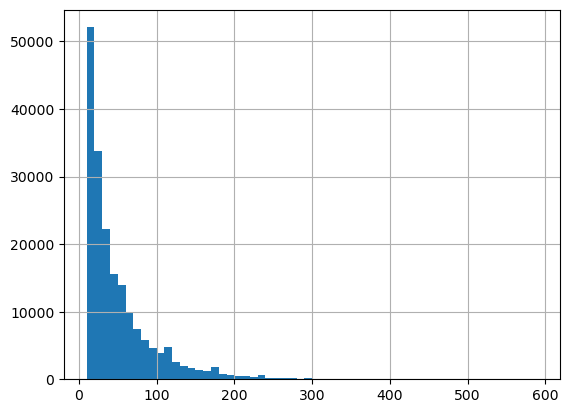

In [ ]:
# Load neighborhood patterns
sqlite_db_fname = r"F:\Research\Wild_fire\Neighborhood_202306.db"
# sql_query =  "SELECT count(*) FROM device_home_areas;"
sql_query = r"""
SELECT *
FROM device_home_areas
GROUP BY origin_idx;
"""
# conn = sqlite3.connect(sqlite_fname)
# pd.read_sql_query(sql_query, conn)

np_df = month_df
print("Dwelling time > 60 count:", len(np_df.query("MEDIAN_DWELL > 60")))
np_df['MEDIAN_DWELL'].hist(bins=range(10, 600, 10))

In [ ]:
# get people_per_device of a county

sampling_rate_df['county_FIPS'] = sampling_rate_df['FIPS'].str[:5]
sampling_rate_county_df = sampling_rate_df.groupby(['county_FIPS'], as_index=False).agg(    # , 'YEAR', "MON", "REGION", "ISO_COUNTRY_CODE"
    county_device=('NUMBER_DEVICES_RESIDING', 'sum'),
    county_device_daytime=('NUMBER_DEVICES_RESIDING', 'sum'),
    county_device_population=('totalpopulation', 'sum'),
    ) 
sampling_rate_county_df['people_per_device_county'] = sampling_rate_county_df['county_device_population'] /  sampling_rate_county_df['county_device']


print("National device and population count:", sampling_rate_county_df[['county_device', 'county_device_population']].sum())

people_per_device_df = sampling_rate_df.merge(sampling_rate_county_df, left_on='county_FIPS', right_on='county_FIPS')
people_per_device_df

In [ ]:
people_per_device_df['people_per_device'].mean(), people_per_device_df['people_per_device'].median()

In [ ]:
people_per_device_df['people_per_device_county'].mean(), people_per_device_df['people_per_device_county'].median()

In [ ]:
monthly_stop_df = pd.read_csv(monthly_stop_fname)
total_stops = monthly_stop_df['monthly_stops'].sum()
print("Total stop:", total_stops, hourly_stop_df.iloc[:, 1:].sum().sum())
monthly_stop_df

In [ ]:
origin_device_df = pd.read_csv(origin_device_fname, dtype={'origin': str})
total_device = origin_device_df['device'].sum()
print("Total device:", total_device)
origin_device_df

### Start to IPF

In [ ]:
# Assume that: in a monthly, CBG outgoers distribution equals to the device distribution
# the sum of outgoers is the sum of stops

hour_cnt = len(hourly_stop_df.columns) - 1
print("Hour count:", hour_cnt)
print("Total stop:", total_stops)
print("Total device:", total_device)

stop_per_device = total_stops / total_device
print("Stop_per_device:", stop_per_device)

print("National people_per_device: ", people_per_device)



In [ ]:
# hourly_stop_sampling_rate_df#.iloc[:, 1:hour_cnt + 1]

In [ ]:
# 37518194037.80905 / 51028323628

In [ ]:
# Assume a stop is a device
hourly_stop_sampling_rate_df = hourly_stop_df.merge(people_per_device_df, left_on='CBG', right_on='FIPS')
for h in range(hour_cnt):
    hourly_stop_sampling_rate_df.iloc[:, h + 1] = hourly_stop_sampling_rate_df.iloc[:, h + 1] * hourly_stop_sampling_rate_df['people_per_device'] 
    # hourly_stop_sampling_rate_df.iloc[:, h + 1] = hourly_stop_sampling_rate_df.iloc[:, h + 1] * people_per_device
    # hourly_stop_sampling_rate_df.iloc[:, h + 1] = hourly_stop_sampling_rate_df.iloc[:, h + 1] * hourly_stop_sampling_rate_df['people_per_device_county'] 
    

# used      CBG level sampling rate: 51028323628.24674
# used   county level sampling rate: 51223351774.32022   # increase 0.3%
# used national level sampling rate: 37518194037.32022   # decrease 26.5%

hourly_stop_df = hourly_stop_sampling_rate_df.iloc[:, :hour_cnt + 1]

hourly_stop_df.iloc[:, 1:hour_cnt + 1].sum().sum()   # used CBG level sampling rate: 51028323628.24674


In [ ]:
monthly_stop_df
monthly_stop_df['monthly_stops'] = hourly_stop_df.iloc[:, 1:].sum().to_list()
monthly_stop_df['monthly_stops'] 

In [ ]:
# Assume a stop is a device
restored_month_hour_outgoer_arr = np.array(monthly_stop_df['monthly_stops'])
print("Restored sum of hourly outgoer:")
total_restored_stop = restored_month_hour_outgoer_arr.sum() 
total_restored_stop,  restored_month_hour_outgoer_arr.shape

In [ ]:
device_to_stop_factor = total_restored_stop / total_device
restored_origin_arr = np.array(origin_device_df['device'] * device_to_stop_factor)
restored_origin_arr.sum(), restored_origin_arr.shape

### IPF

In [ ]:
import numpy as np
from ipfn import ipfn

aggregates = [restored_origin_arr, restored_month_hour_outgoer_arr]
dimensions = [[0], [1]]

seed_arr = np.ones((len(restored_origin_arr), len(restored_month_hour_outgoer_arr)))

IPF = ipfn.ipfn(seed_arr, aggregates, dimensions, convergence_rate=1e-3)
m = IPF.iteration()
print(m)

In [ ]:
m.shape

In [ ]:
(m.sum(axis=1) - restored_origin_arr).sum(), (m.sum(axis=0) - restored_month_hour_outgoer_arr).sum()

In [ ]:
hourly_columns = [f'hour_{h+1}' for h in range(restored_month_hour_outgoer_arr.shape[0])]
IPF_df = pd.DataFrame(m, columns=hourly_columns)
print("Total visitor:", IPF_df.sum().sum())
IPF_df['CBG'] = origin_device_df['origin']
IPF_df = IPF_df[['CBG'] + hourly_columns]

IPF_fname = os.path.join(data_dir, f"IPF_origin_outgoer_hourly_{year}{month:02}.csv")
IPF_df.to_csv(IPF_fname, index=False)
IPF_df

# Get hourly population map

In [ ]:
hourly_stop_df = pd.read_csv(hourly_stop_fname, dtype={"CBG":str})
hourly_stop_df

In [ ]:
# Assume a stop is a device
restored_hourly_outgoer_arr = np.array(hourly_stop_df.iloc[:, 1:] * people_per_device)
print("Restored sum of hourly outgoer:")
total_restored_stop = restored_hourly_outgoer_arr.sum() 
total_restored_stop,  restored_hourly_outgoer_arr.shape

In [ ]:
IPF_df.set_index(['CBG']).index
# hourly_stop_df.set_index('CBG').index

In [ ]:
# (restored_hourly_outgoer_arr.sum(axis=0) - m.sum(axis=0)).sum()
CBGs = set(IPF_df['CBG'].to_list()).intersection(set(hourly_stop_df['CBG'].to_list()))
CBGs = CBGs.intersection(sampling_rate_df['CENSUS_BLOCK_GROUP'])
CBGs = list(CBGs)

In [ ]:
filtered_hourly_stop_df = hourly_stop_df.set_index('CBG').loc[CBGs].sort_index()  * people_per_device
filtered_hourly_stop_df

In [ ]:
# sampling_rate_df
filtered_IPF_df = IPF_df.set_index('CBG').loc[CBGs].sort_index()
filtered_IPF_df

In [ ]:
random_hour = 250
filtered_IPF_df[f'hour_{random_hour}'].sum() - filtered_hourly_stop_df[f'hour_{random_hour}'].sum()

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(25, 10))
# plt.hist(visit_arr.sum(axis=1), bins=range(10000, 100000, 10000)) #.sum()
ax.plot(range(720), filtered_IPF_df.sum(axis=0))
ax.plot(range(720), filtered_hourly_stop_df.sum(axis=0))
ax.set_ylabel("Block group stops")
ax.set_xlabel("Hour")
ax.set_title(f"National filtered_IPF_df stops ({year}-{month})")

In [ ]:
sampling_rate_df

In [ ]:
sampling_rate_df['CBG'] = sampling_rate_df['CENSUS_BLOCK_GROUP'].astype(str).str.zfill(12)
sampling_rate_df = sampling_rate_df.set_index("CBG")
filtered_population_df = sampling_rate_df.loc[CBGs].sort_index()
filtered_population_df

In [ ]:
hour_cnt = restored_month_hour_outgoer_arr.shape[0]

hourly_population_df = filtered_IPF_df.copy()
for c in hourly_population_df.columns:
    hourly_population_df[c] = filtered_population_df['totalpopulation'].to_list()

In [ ]:
hourly_population_map_df = hourly_population_df - filtered_IPF_df + filtered_hourly_stop_df 
hourly_population_map_fname = os.path.join(data_dir, f'hourly_population_map_{year}{month}.csv')
hourly_population_map_df.to_csv(hourly_population_map_fname)
hourly_population_map_df

In [ ]:
random_hour = 50
hourly_population_map_df[f'hour_{random_hour}'].sum()

In [ ]:
filtered_IPF_df
# filtered_hourly_stop_df

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(25, 10))
# plt.hist(visit_arr.sum(axis=1), bins=range(10000, 100000, 10000)) #.sum()
ax.plot(range(720), hourly_population_map_df.sum(axis=0))
# ax.plot(range(720), filtered_hourly_stop_df.sum(axis=0))
ax.set_ylabel("Block group stops")
ax.set_xlabel("Hour")
ax.set_title(f"National filtered_IPF_df stops ({year}-{month})")

## Show New York City

In [ ]:
# NYC_counties = ['36005', '36061', '36081', '36047', '36085']
NYC_counties = ['36061']
hourly_population_map_df['County_FIPS'] = hourly_population_map_df.reset_index()['CBG'].astype(str).str[:5].to_list()
hourly_population_map_df['County_FIPS']

In [ ]:
target_hourly_pop_df = hourly_population_map_df[hourly_population_map_df['County_FIPS'].isin(NYC_counties)]
target_hourly_pop_df

In [ ]:
sampling_rate_df['County_FIPS'] = sampling_rate_df['CENSUS_BLOCK_GROUP'].str[:5].to_list()
target_pop_df = sampling_rate_df[sampling_rate_df['County_FIPS'].isin(NYC_counties)]
target_pop_df

In [ ]:
import geopandas as gpd

blockgroup_fname = r"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\vectors\tl_2019_36_bg.zip"
gdf = gpd.read_file(blockgroup_fname)
gdf['County_FIPS'] = gdf['GEOID'].astype(str).str.zfill(12).str[:5]
gdf['CBG'] = gdf['GEOID'].astype(str).str.zfill(12) 


target_blockgroup_gdf = gdf[gdf['County_FIPS'].isin(NYC_counties)]



# fig, axs = plt.subplots(figsize=(20, 20), nrows=row_cnt, ncols=col_cnt)
# gdf.plot()
target_blockgroup_gdf

In [ ]:
# target_blockgroup_gdf
# target_pop_df.drop(columns='CBG', inplace=True)#.reset_index()
# target_pop_df.reset_index(inplace=True)
target_pop_df

In [ ]:
target_pop_df.loc[:, 'CBG'] = target_pop_df['CENSUS_BLOCK_GROUP'] 
merged_gdf = target_blockgroup_gdf.merge(target_pop_df, left_on='CBG', right_on='CBG')
merged_gdf.plot(column='totalpopulation',  legend=True)

In [ ]:
merged_gdf = target_blockgroup_gdf.merge(target_hourly_pop_df.reset_index(), left_on='CBG', right_on='CBG')
merged_gdf.plot(column='hour_6',  legend=True)

In [ ]:
row_cnt = 5
col_cnt = 5
vmax = max(target_hourly_pop_df.iloc[:, :hour_cnt].max().max(), target_pop_df['totalpopulation'].max())
vmax = 10000
fig, axs = plt.subplots(figsize=(20, 40), nrows=row_cnt, ncols=col_cnt)

used_ax_cnt = 0
for row in range(row_cnt):
    for col in range(col_cnt):
        if used_ax_cnt == 24:
            continue
        merged_gdf = target_blockgroup_gdf.merge(target_hourly_pop_df, left_on='CBG', right_on='CBG')
        hour = row * row_cnt + col + 1
        ax=axs[row, col]
        ax.axis('off')
        ax.set_title(f"hour_{hour - 1}")
        merged_gdf.plot(column=f'hour_{hour + 24*4}',  legend=True, ax=ax, vmax=vmax)
        used_ax_cnt += 1

ax=axs[row_cnt - 1, col_cnt - 1]
ax.axis('off')
ax.set_title(f"totalpopulation")
merged_gdf = target_blockgroup_gdf.merge(target_pop_df, left_on='CBG', right_on='CBG')
merged_gdf.plot(column='totalpopulation',  legend=True, ax=ax, vmax=vmax)


# Show other county

In [ ]:
CBG_2019_fname = r"D:\Research\safegraph_bias\blockgoups\blockgoups2019.zip"
CBG2019_gdf = gpd.read_file(CBG_2019_fname)
CBG2019_gdf['County_FIPS'] = CBG2019_gdf['GEOID'].astype(str).str.zfill(12).str[:5]
CBG2019_gdf['CBG'] = CBG2019_gdf['GEOID'].astype(str).str.zfill(12) 
CBG2019_gdf

In [ ]:
target_counties = ['42027']
hourly_population_map_df['County_FIPS'] = hourly_population_map_df.reset_index()['CBG'].astype(str).str[:5].to_list()
target_hourly_pop_df = hourly_population_map_df[hourly_population_map_df['County_FIPS'].isin(target_counties)]

sampling_rate_df['County_FIPS'] = sampling_rate_df['CENSUS_BLOCK_GROUP'].str[:5].to_list()
target_pop_df = sampling_rate_df[sampling_rate_df['County_FIPS'].isin(target_counties)]


# CBG2019_gdf['County_FIPS'] = CBG2019_gdf['GEOID'].astype(str).str.zfill(12).str[:5]
# CBG2019_gdf['CBG'] = CBG2019_gdf['GEOID'].astype(str).str.zfill(12) 

target_blockgroup_gdf = CBG2019_gdf[CBG2019_gdf['County_FIPS'].isin(target_counties)]
target_blockgroup_gdf

In [ ]:


row_cnt = 5
col_cnt = 5
vmax = max(target_hourly_pop_df.iloc[:, :hour_cnt].max().max(), target_pop_df['totalpopulation'].max())
vmax = 5000
print("vmax: ", vmax)
fig, axs = plt.subplots(figsize=(40, 40), nrows=row_cnt, ncols=col_cnt)

used_ax_cnt = 0
for row in range(row_cnt):
    for col in range(col_cnt):
        if used_ax_cnt == 24:
            continue
        merged_gdf = target_blockgroup_gdf.merge(target_hourly_pop_df, left_on='CBG', right_on='CBG')
        hour = row * row_cnt + col + 1
        ax=axs[row, col]
        ax.axis('off')
        ax.set_title(f"hour_{hour - 1}")
        merged_gdf.plot(column=f'hour_{hour + 24*4}',  legend=True, ax=ax, vmax=vmax)  # , vmax=vmax
        used_ax_cnt += 1

ax=axs[row_cnt - 1, col_cnt - 1]
ax.axis('off')
ax.set_title(f"totalpopulation")
merged_gdf = target_blockgroup_gdf.merge(target_pop_df, left_on='CBG', right_on='CBG')
merged_gdf.plot(column='totalpopulation',  legend=True, ax=ax, vmax=vmax) # , vmax=vmax

In [ ]:
target_hourly_pop_df.iloc[:, :hour_cnt].max(axis=1)  #.median()
target_pop_df['totalpopulation'].hist(bins=100)
target_pop_df['totalpopulation'].std()

target_hourly_pop_df.iloc[:, :hour_cnt].mean(axis=1).mean() + target_hourly_pop_df.iloc[:, :hour_cnt].mean(axis=1).std() * 3
# target_hourly_pop_df.iloc[:, :hour_cnt].mean(axis=1).std() * 3

In [ ]:
target_counties = ['45079']
hourly_population_map_df['County_FIPS'] = hourly_population_map_df.reset_index()['CBG'].astype(str).str[:5].to_list()
target_hourly_pop_df = hourly_population_map_df[hourly_population_map_df['County_FIPS'].isin(target_counties)]

sampling_rate_df['County_FIPS'] = sampling_rate_df['CENSUS_BLOCK_GROUP'].str[:5].to_list()
target_pop_df = sampling_rate_df[sampling_rate_df['County_FIPS'].isin(target_counties)]


# CBG2019_gdf['County_FIPS'] = CBG2019_gdf['GEOID'].astype(str).str.zfill(12).str[:5]
# CBG2019_gdf['CBG'] = CBG2019_gdf['GEOID'].astype(str).str.zfill(12) 

target_blockgroup_gdf = CBG2019_gdf[CBG2019_gdf['County_FIPS'].isin(target_counties)]
target_blockgroup_gdf

row_cnt = 5
col_cnt = 5
# vmax = max(target_hourly_pop_df.iloc[:, :hour_cnt].max(axis=1).max(), target_pop_df['totalpopulation'].max())
vmax = target_hourly_pop_df.iloc[:, :hour_cnt].mean(axis=1).mean() + target_hourly_pop_df.iloc[:, :hour_cnt].mean(axis=1).std() * 3
vmax= 8000
print("vmax: ", vmax)
fig, axs = plt.subplots(figsize=(40, 40), nrows=row_cnt, ncols=col_cnt)

used_ax_cnt = 0
for row in range(row_cnt):
    for col in range(col_cnt):
        if used_ax_cnt == 24:
            continue
        merged_gdf = target_blockgroup_gdf.merge(target_hourly_pop_df, left_on='CBG', right_on='CBG')
        hour = row * row_cnt + col + 1
        ax=axs[row, col]
        ax.axis('off')
        ax.set_title(f"hour_{hour - 1}")
        merged_gdf.plot(column=f'hour_{hour + 24*3}',  legend=True, ax=ax, vmax=vmax)  # , vmax=vmax
        used_ax_cnt += 1

ax=axs[row_cnt - 1, col_cnt - 1]
ax.axis('off')
ax.set_title(f"totalpopulation")
merged_gdf = target_blockgroup_gdf.merge(target_pop_df, left_on='CBG', right_on='CBG')
merged_gdf.plot(column='totalpopulation',  legend=True, ax=ax, vmax=vmax) # , vmax=vmax

In [ ]:
cmap = 'viridis'
day = 12

# target_county = 'New York, NY'
target_county = 'Centre, PA'
# target_county = 'Richland, SC'
# target_county = 'Lexington, SC'
# target_county = 'Union, NJ'
# target_county = 'Fairfax, VA'

county_FIPS = county_FIPS_dict[target_county]

target_counties = [county_FIPS] # ['36061']   # 06039
hourly_population_map_df['County_FIPS'] = hourly_population_map_df.reset_index()['CBG'].astype(str).str[:5].to_list()
target_hourly_pop_df = hourly_population_map_df[hourly_population_map_df['County_FIPS'].isin(target_counties)]

sampling_rate_df['County_FIPS'] = sampling_rate_df['CENSUS_BLOCK_GROUP'].str[:5].to_list()
target_pop_df = sampling_rate_df[sampling_rate_df['County_FIPS'].isin(target_counties)]


# CBG2019_gdf['County_FIPS'] = CBG2019_gdf['GEOID'].astype(str).str.zfill(12).str[:5]
# CBG2019_gdf['CBG'] = CBG2019_gdf['GEOID'].astype(str).str.zfill(12) 

target_blockgroup_gdf = CBG2019_gdf[CBG2019_gdf['County_FIPS'].isin(target_counties)]
target_blockgroup_gdf

row_cnt = 2
col_cnt = 13
# vmax = max(target_hourly_pop_df.iloc[:, :hour_cnt].max(axis=1).max(), target_pop_df['totalpopulation'].max())
vmax = target_hourly_pop_df.iloc[:, :hour_cnt].mean(axis=1).mean() + target_hourly_pop_df.iloc[:, :hour_cnt].mean(axis=1).std() * 3

print("vmax: ", vmax)
fig, axs = plt.subplots(figsize=(40, 10), nrows=row_cnt, ncols=col_cnt)

# draw hourly map
used_ax_cnt = 0
hour_24_pop = []
for row in range(row_cnt):
    for col in range(1, col_cnt, 1):
        # if used_ax_cnt == 24:
        #     continue
        merged_gdf = target_blockgroup_gdf.merge(target_hourly_pop_df, left_on='CBG', right_on='CBG')
        hour = used_ax_cnt
        ax=axs[row, col]
        ax.axis('off')
        ax.set_title(f"{hour:02}:00:00")
        hour_column = f'hour_{hour + 1 + 24*(day - 1)}'
        merged_gdf.plot(column=hour_column, ax=ax, vmax=vmax, cmap=cmap)  # , vmax=vmax ,  legend=True
        hour_24_pop.append(target_hourly_pop_df[hour_column].sum())
        used_ax_cnt += 1

ax=axs[0, 0]
ax.axis('off')
ax.set_title(f"ACS 2019 Population")
merged_gdf = target_blockgroup_gdf.merge(target_pop_df, left_on='CBG', right_on='CBG')
merged_gdf.plot(column='totalpopulation', ax=ax, vmax=vmax, cmap=cmap) # , vmax=vmax ,  legend=True

# draw county-level population
ax=axs[1, 0]
# ax.axis('off')
ax.set_title('County hourly population')
ax.set_ylabel('Population')
ax.set_xlabel('Hour')
ax.plot(hour_24_pop, label='hourly population')
ax.axhline(merged_gdf['totalpopulation'].sum(), color='red', label='ACS population')
ax.legend()

 
fig.suptitle(f"Hourly population of county {target_county}: {year}-{month:02}-{day:02}", fontsize=24, y=1)


# Add colorbar axes at the bottom and align it with the left and right of the subplots
pos1 = axs[0, 0].get_position() # get the original position for first axis
pos2 = axs[-1, -1].get_position()
cax = fig.add_axes([pos1.x0 * 1.01, 0, (pos2.x1 - pos1.x0) * 0.99, 0.008])    # [left, bottom, width, height]  # bottom
value_max =vmax
value_min = 0

sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=value_min, vmax=value_max))
sm._A = []
# plt.colorbar(sm, cax=cax, label="Bias")
cbar = plt.colorbar(sm, cax=cax, orientation='horizontal')

for t in cbar.ax.get_xticklabels():
    t.set_fontsize(16)

cbar.set_label('Population', labelpad=-80,   rotation=0, fontsize=24, loc='center')

png_name = os.path.join(save_dir, f"{target_county.replace(', ', '_')}_hourly_population_{year}{month:02}{day:02}.png")

plt.savefig(png_name, dpi=300, bbox_inches='tight', pad_inches=0.2)

In [ ]:
fig, ax = plt.subplots()
ax.set_title('County hourly population')
ax.set_ylabel('Population')
ax.set_xlabel('Hour')
ax.plot(hour_24_pop, label='hourly population')
ax.axhline(merged_gdf['totalpopulation'].sum(), color='red', label='ACS population')
ax.legend()


In [ ]:
filtered_hourly_stop_df['County_FIPS'] = filtered_hourly_stop_df.reset_index()['CBG'].str[:5].to_list()
target_hourly_stop_df = filtered_hourly_stop_df[filtered_hourly_stop_df['County_FIPS'].isin(target_counties)]
target_hourly_stop_df.sample(1).iloc[:, :hour_cnt].sum(axis=0).plot()

In [ ]:

# county_FIPS_dict

# Not used

In [ ]:
person_per_device = 7.24
hourly_df = pd.read_csv(r"F:\Research\Wild_fire\hourly_stops_202306.csv") * person_per_device
hourly_df.rename(columns={'stop':'outgoer'}, inplace=True)
hourly_df

In [ ]:
outgoer_df = pd.read_csv(r"F:\Research\Wild_fire\origin_device_202306.csv" ) #* person_per_device
outgoer_df['origin'] = outgoer_df['origin'].astype(str).str.zfill(12)

total_device = outgoer_df['device'].sum()
total_outgoer = hourly_df['outgoer'].sum()

total_device, total_outgoer, 

In [ ]:
# let the sum of total_device = total_outgoer
outgoer_df['outgoer'] = outgoer_df['device'] / total_device * total_outgoer
outgoer_df['outgoer'].sum()

In [ ]:
# ! pip install ipfn

In [ ]:
seed_arr = np.ones((len(outgoer_df), len(hourly_df)))
seed_arr.shape

In [ ]:
import numpy as np
from ipfn import ipfn

# m = [[40, 30, 20, 10], [35, 50, 100, 75], [30, 80, 70, 120], [20, 30, 40, 50]]
# m = np.array(m)
# xip = np.array([150, 300, 400, 150])
# xpj = np.array([200, 300, 400, 100])
# 
# aggregates = [xip, xpj]
aggregates = [np.array(outgoer_df['outgoer']), np.array(hourly_df['outgoer'])]
dimensions = [[0], [1]]

IPF = ipfn.ipfn(seed_arr, aggregates, dimensions, convergence_rate=1e-2)
m = IPF.iteration()
print(m)

In [ ]:
m.sum(axis=0).sum(), m.sum(axis=1).sum()

In [ ]:
hourly_columns = [f'hour_{h+1}' for h in range(hourly_stop_arr.shape[1])]


In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))
# plt.hist(visit_arr.sum(axis=1), bins=range(10000, 100000, 10000)) #.sum()
ax.plot(range(720), m.sum(axis=0))
ax.set_ylabel("Block group stops")
ax.set_xlabel("Hour")
ax.set_title("National hourly stops (2023-06)")

In [ ]:
m

In [ ]:
visit_arr + m#.shape

## Process the CBG list

In [ ]:
import pandas as pd
CBG_list_2019_df = pd.read_csv(r"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\ACS_2019_CBG.csv", dtype={'GEOID':str})
CBG_list_2019_df

In [ ]:
CBG_list_2019_df.sort_values('GEOID')[['GEOID']].to_csv(r'D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\ACS_2019_CBG_list.csv', index=False)